# 7장(그래프)-프로그래밍 실습

## 7-1. 그래프의 기본 개념

### [예제 7-1] 무향 그래프와 유향 그래프 그리기

#무향그래프:


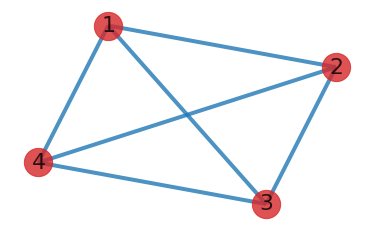

유향그래프:


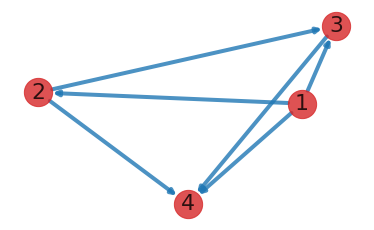

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)

# 그래프 그리기
def makeGraph(V, E, Gtype):
    
    if Gtype == 0:
        G = nx.Graph()   # UndirectedGraph(무향 그래프)
        print('#무향그래프:')
    elif Gtype == 1:
        G = nx.DiGraph() # DirectedGraph(유향 그래프)
        print('유향그래프:')

    G.add_nodes_from(V) # 점 추가
    G.add_edges_from(E) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    nx.draw(G, with_labels=True, 
            node_color="tab:red", node_size=800, # 노드
            edge_color="tab:blue", width=4,      # 에지
            font_size=22, alpha=0.8)

    plt.show()

V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)}    
    
makeGraph(V, E, 0)  # 무향 그래프 만들기
makeGraph(V, E, 1)  # 유향 그래프 만들기


### [예제 7-2] 인접 행렬로 나타내기

#### # 인접 행렬 나타내기

In [3]:
import numpy as np

# 숫자 순서쌍으로 변환
def convertEdgeToNum(V, E):
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    if any(isinstance(v, str) for v in V):
        data  = { v:idx+1 for idx, v in enumerate(V) }  # V 원소 숫자로 표시
        result= [(data[v1], data[v2])  for v1, v2 in E] # E 순서쌍으로 표시    
        return result
    else:
        return E


# 인접행렬 만들기
def makeAdjacencyMatirx(V, E, Gtype):
    
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    E = convertEdgeToNum(V, E)
    print(E)

    # 빈(0) 행렬 만들기
    adj = [[0 for _ in range(len(V))] for _ in range(len(V))]

    # 인접 행렬 만들기
    for t in E:
        src, dest = t
        if Gtype == 0:   # 무향            
            adj[src-1][dest-1] = 1
            adj[dest-1][src-1] = 1
        elif Gtype == 1: # 유향
            adj[src-1][dest-1] = 1

    print(np.array(adj) )        
    return np.array(adj) 
   
    
V = {1,2,3,4}
E = {(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)} 

print('#무향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, 0)  # 무향 그래프 인접행렬
print()
print('#유향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, 1)  # 유향 그래프 인접행렬

#무향 그래프 인접행렬:
{(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1, 4)}
[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]

#유향 그래프 인접행렬:
{(2, 3), (2, 4), (1, 2), (3, 4), (1, 3), (1, 4)}
[[0 1 1 1]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 0 0]]


array([[0, 1, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

#### # 연결 리스트 나타내기

In [73]:
# 연결리스트 만들기
def makeLinkedList(V, E, Gtype):
    
    # 만약 V 원소가 String일 경우 숫자 순서쌍으로 변환하기
    E = convertEdgeToNum(V, E)
    
    adj = [[] for _ in range(len(V))]

    for t in E:
        src, dest = t    
        if Gtype == 0:   # 무향            
            adj[src-1].append(dest)
            adj[dest-1].append(src)
        elif Gtype == 1: # 유향
            adj[src-1].append(dest)
    
    # 연결 리스트 출력하기
    if isinstance(V, str): # V 원소가 문자인 경우
        for idx, v in enumerate(adj):
            v.sort()
            print(f'v[{V[idx]}]의 연결 리스트 =  {V[v-1]}')
    else:
        for idx, v in enumerate(adj):
            v.sort()
            print(f'v[{idx+1}]의 연결 리스트 =  {v}')
        
    return adj
    
V = [1,2,3,4]
E = [(1,2),(1,3),(1,4),(2,3),(2,4),(3,4)] 

print('#무향 그래프 연결리스트:')
makeLinkedList(V, E, 0)  # 무향 그래프 인접행렬
print()
print('#유향 그래프 연결리스트:')
makeLinkedList(V, E, 1)  # 유향 그래프 인접행렬

#무향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2, 3, 4]
v[2]의 연결 리스트 =  [1, 3, 4]
v[3]의 연결 리스트 =  [1, 2, 4]
v[4]의 연결 리스트 =  [1, 2, 3]

#유향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2, 3, 4]
v[2]의 연결 리스트 =  [3, 4]
v[3]의 연결 리스트 =  [4]
v[4]의 연결 리스트 =  []


[[2, 3, 4], [3, 4], [4], []]

### [실습] 그래프 & 인접행렬 & 연결리스트 표현하기

#무향그래프:


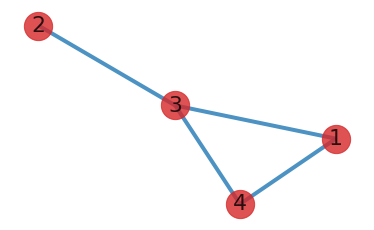

#무향 그래프 인접행렬:
{(2, 3), (1, 3), (3, 4), (1, 4)}
[[0 0 1 1]
 [0 0 1 0]
 [1 1 0 1]
 [1 0 1 0]]
#무향 그래프 연결리스트:
v[1]의 연결 리스트 =  [3, 4]
v[2]의 연결 리스트 =  [3]
v[3]의 연결 리스트 =  [1, 2, 4]
v[4]의 연결 리스트 =  [1, 3]


[[3, 4], [3], [1, 2, 4], [1, 3]]

In [74]:
V = {1,2,3,4}
E = {(1,3),(1,4),(2,3),(3,4)} 
Gtype = 0

makeGraph(V, E, Gtype)            # 무향 그래프 만들기
print('#무향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, Gtype)  # 무향 그래프 인접행렬
print('#무향 그래프 연결리스트:')
makeLinkedList(V, E, Gtype)       # 무향 그래프 인접행렬

유향그래프:


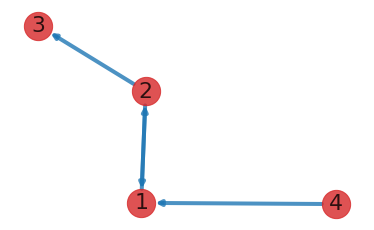

#유향 그래프 인접행렬:
{(2, 3), (1, 2), (4, 1), (2, 1)}
[[0 1 0 0]
 [1 0 1 0]
 [0 0 0 0]
 [1 0 0 0]]
#유향 그래프 연결리스트:
v[1]의 연결 리스트 =  [2]
v[2]의 연결 리스트 =  [1, 3]
v[3]의 연결 리스트 =  []
v[4]의 연결 리스트 =  [1]


[[2], [1, 3], [], [1]]

In [75]:
V = {1,2,3,4}
E = {(1,2),(2,1),(2,3),(4,1)} 
Gtype = 1

makeGraph(V, E, Gtype)             # 유향 그래프 만들기
print('#유향 그래프 인접행렬:')
makeAdjacencyMatirx(V, E, Gtype)  # 유향 그래프 인접행렬
print('#유향 그래프 연결리스트:')
makeLinkedList(V, E, Gtype)      # 유향 그래프 인접행렬

### # 그래프의 정점의 차수 출력하기

In [86]:
import numpy as np

# 정점의 차수
def getVertexDegree(V, E, Gtype):   
    
    # Edge의 원소를 counting 한다.
    if Gtype == 0: # 무향
        print('#무향 그래프 정점의 차수')
        data = [ [v1, v2] for v1, v2 in E] # 튜플을 리스트로 만들기
        data = sum(data,[])                # 1 차원 리스트로 만들기
        for v in V:
            print(f'정점 [{v}]의 차수: {data.count(v)}')
    
    # 관계 행렬을 이용한다.
    elif Gtype == 1: # 유향
        print('#유향 그래프 정점의 차수')
        matrix = makeAdjacencyMatirx(V, E, Gtype)    
        
        degrees1 = np.sum(matrix, axis=0).tolist()  # 내차수
        degrees2 = np.sum(matrix, axis=1).tolist()  # 외차
        for idx, v in enumerate(degrees1):
            print(f'정점 [{V[idx]}]의 내차수: {v} 외차수: {degrees2[idx]} ')
            

### [예제 7-3] 유향 그래프의 정점의 차수 출력하기

In [88]:
V = ['a','b','c','d', 'e']   # 출력을 위해 {}대신 []사용함
E = [('a','b'),('a','d'),('b','c'),('b','d'),
     ('b','e'),('c','a'),('c','e'),('d','c')] 

Gtype = 1 # 유향
getVertexDegree(V, E, Gtype)

#유향 그래프 정점의 차수
[(1, 2), (1, 4), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 3)]
[[0 1 0 1 0]
 [0 0 1 1 1]
 [1 0 0 0 1]
 [0 0 1 0 0]
 [0 0 0 0 0]]
정점 [a]의 내차수: 1 외차수: 2 
정점 [b]의 내차수: 1 외차수: 3 
정점 [c]의 내차수: 2 외차수: 2 
정점 [d]의 내차수: 2 외차수: 1 
정점 [e]의 내차수: 2 외차수: 0 


### [예제 7-4] 무향 그래프의 정점의 차수 출력하기

In [90]:
V = ['A','B','C','D', 'E']   # 출력을 위해 {}대신 []사용함
E = [('A','B'),('B','A'),('B','C'),('B','E'),('E','D'),('D','D')] 

Gtype = 0 # 유향
getVertexDegree(V, E, Gtype)

#무향 그래프 정점의 차수
정점 [A]의 차수: 2
정점 [B]의 차수: 4
정점 [C]의 차수: 1
정점 [D]의 차수: 3
정점 [E]의 차수: 2


---------------------

## 7-2. 여러 가지 그래프

### # 가중치 그래프 그리기
- 방법1: 
> G.add_weighted_edges_from([('B','C',13),('C','F',21),('C','E',25)])
- 방법2: 
> G.add_edges_from([('B','C',{'weight':13}),('C','F',{'weight':21}),('C','E',{'weight':25})]

In [104]:
import networkx as nx
import matplotlib.pyplot as plt

# E에 가중치 추가하기
def makeWeight(E, W):     
    # 방법1: 
    result = [(v1, v2, W[idx]) for idx, (v1, v2) in enumerate(E) ]
#     # 방법2: 
#     result = [(v1, v2, {'weight':W[idx]}) for idx, (v1, v2) in enumerate(E) ]

    return result
    

# 가중치 그래프 그리기
def makeWeightedGraph(V, E, W, Gtype):
    
    E = makeWeight(E, W) # 가중치 추가하기
    
    if Gtype == 0:
        G = nx.Graph()   # UndirectedGraph(무향 그래프)
        print('#무향그래프: 가중치')
    elif Gtype == 1:
        G = nx.DiGraph() # DirectedGraph(유향 그래프)
        print('유향그래프: 가중치')

    G.add_nodes_from(V) # 점 추가
    # 방법1:    
    G.add_weighted_edges_from(E) # 간선 추가
#     # 방법2: 
#     G.add_edges_from(E) # 간선 추가

    #그래프 그리기: 실행될 때마다 vertex(node)의 위치가 변경될 수 있다.)
    pos=nx.spring_layout(G)      # 위치 정보 만들기
    weight = nx.get_edge_attributes(G, 'weight')
    
    nx.draw(G, pos, with_labels=True, 
            node_color="tab:red", node_size=800, # 노드
            edge_color="tab:blue", width=4,      # 에지
            font_size=22, alpha=0.8)   
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weight) # 가중치 정보 덧그리기

    plt.show()
    

### [예제 7-14] 가중치 그래프 그리기

#무향그래프: 가중치


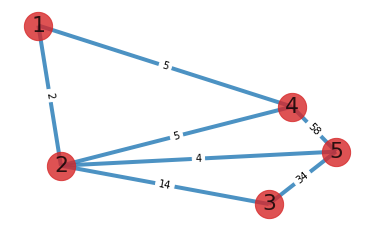

In [105]:
V = [1,2,3,4,5]
E = [(1,2),(1,4),(2,3),(2,4),(2,5),(3,5),(4,5)]
W = [2,5,14,5,4,34,58]
Gtype = 0

makeWeightedGraph(V, E, W, Gtype)

-------------------------------

THE END